In [2]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

11493376/11490434 [==============================] - 3s 0us/step


Text(0.5, 1.0, 'Ground Truth : 5')

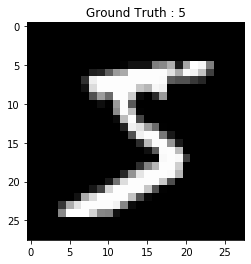

In [3]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
#display the first image in the training data
plt.imshow(train_images[0,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[0]))
# plt.show()

In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [5]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data 4. loss: 0.5048 - accuracy: 0.9765 without scaling. Loss significantly increases and accuracy decreases. 
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
#3. additional layer with loss: 0.1144 - accuracy: 0.9814 -> loss and accuracy decrease (not so significant in accuracy though)
#model.add(Dense(300, activation='tanh')) 
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Epoch 1/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2662 - accuracy: 0.9182 - val_loss: 0.1262 - val_accuracy: 0.9621
Epoch 2/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0924 - accuracy: 0.9712 - val_loss: 0.0809 - val_accuracy: 0.9763
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0806 - val_accuracy: 0.9742
Epoch 4/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0397 - accuracy: 0.9870 - val_loss: 0.0736 - val_accuracy: 0.9776
Epoch 5/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0775 - val_accuracy: 0.9780
Epoch 6/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0696 - val_accuracy: 0.9824
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0789 - val_accuracy: 0.9792

In [8]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
#loss: 0.1236 - accuracy: 0.9846

313/313 [==============================] - 1s 2ms/step - loss: 0.1236 - accuracy: 0.9846
Evaluation result on Test Data : Loss = 0.12363076210021973, accuracy = 0.9846000075340271


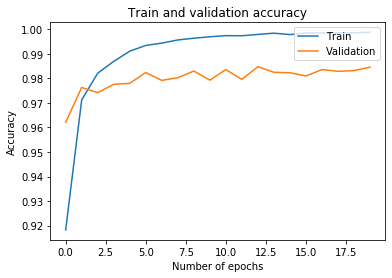

In [9]:
#1. plot the loss and accuracy for both training data and validation data.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train and validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

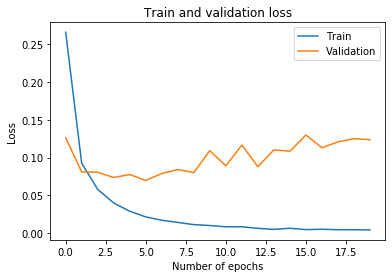

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train and validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Prediction:  7


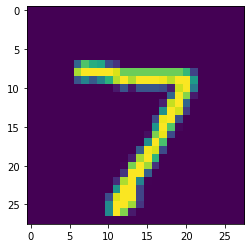

In [12]:
#2. evaluating the model prediction
pred = model.predict([test_data])
print('Prediction: ', np.argmax(pred[0]))
# Display the actual result
plt.imshow(test_images[0,:,:])
plt.show()
## The prediction was accurate